In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')

# 1. Tiền xử lý dữ liệu

In [ ]:
project_url = '../../../../source/DU_AN_CNTT_2/'
project_url = glob.glob(project_url)[0]
path = os.path.join(project_url, 'Data/d2/diabetes_012_health_indicators_BRFSS2021_cleaned.csv')
df = pd.read_csv(path)
df

,Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15.0,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,2,1,0,1,28.0,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,2,1,1,1,33.0,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,2,0,1,1,29.0,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24.0,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219546,2,1,1,1,21.0,0,0,0,1,1,...,1,0,4,0,0,0,1,10,2,3
219547,0,1,0,1,25.0,1,0,0,1,1,...,0,1,2,20,0,0,0,3,4,5
219548,0,0,1,1,31.0,0,0,0,1,1,...,1,0,2,0,0,0,1,7,6,10
219549,0,1,0,1,24.0,0,0,0,1,1,...,1,0,2,0,0,0,1,10,4,6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219551 entries, 0 to 219550
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Class                 219551 non-null  int64  
 1   HighBP                219551 non-null  int64  
 2   HighChol              219551 non-null  int64  
 3   CholCheck             219551 non-null  int64  
 4   BMI                   219551 non-null  float64
 5   Smoker                219551 non-null  int64  
 6   Stroke                219551 non-null  int64  
 7   HeartDiseaseorAttack  219551 non-null  int64  
 8   PhysActivity          219551 non-null  int64  
 9   Fruits                219551 non-null  int64  
 10  Veggies               219551 non-null  int64  
 11  HvyAlcoholConsump     219551 non-null  int64  
 12  AnyHealthcare         219551 non-null  int64  
 13  NoDocbcCost           219551 non-null  int64  
 14  GenHlth               219551 non-null  int64  
 15  

## 1.1 Train Test split và normalize

### 1.1.1 Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X, y = df.drop(columns=['Class']), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts().sort_index()

,count
Class,
0,144999
1,4256
2,26385


### 1.1.2. Normalize

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_train.value_counts().sort_index()

,count
Class,
0,144999
1,4256
2,26385


### 1.1.3. Kết quả và lưu tập dữ liệu trước cân bằng

In [32]:
origin = np.concatenate((y_train.values.reshape(-1,1), X_train,), axis=1)
origin = pd.DataFrame(origin, columns=df.columns)
origin = origin.sample(frac = 0.1, random_state = 42)
path = os.path.join(project_url, f'Data/d2/Balanced Data/origin.csv')
origin.to_csv(path, index=False)

In [33]:
train = np.concatenate((y_train.values.reshape(-1,1), X_train,), axis=1)
train = pd.DataFrame(train, columns=df.columns)
train.value_counts('Class').sort_index()

,count
Class,
0.0,144999
1.0,4256
2.0,26385


## 1.2 Can Bang

In [34]:
categorical_columns = [i for i in df.columns if i not in ['Class','BMI', 'MentHlth', 'PhysHlth']]
categorical_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

### Balance

In [35]:
X_train, y_train = train.drop('Class', axis=1), train['Class']
y_train.value_counts().sort_index()

,count
Class,
0.0,144999
1.0,4256
2.0,26385


In [36]:
from imblearn.over_sampling import SMOTE, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek

In [37]:
ncols = [i-1 for (i,j) in enumerate(df.columns) if j in categorical_columns]
ncols

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20]

In [38]:
methods = [
    SMOTE(sampling_strategy='not majority',k_neighbors=3, random_state=42),
    SMOTENC(sampling_strategy='all', categorical_features=ncols, k_neighbors=3, random_state=42),
    ADASYN(sampling_strategy='auto', random_state = 42, n_neighbors=3),
    NearMiss(sampling_strategy='not minority', n_neighbors=2),
    TomekLinks(sampling_strategy='auto'),
    EditedNearestNeighbours(sampling_strategy= 'not minority'),
    SMOTEENN(
        smote = SMOTE(
            sampling_strategy='all',
            k_neighbors=3),
        enn = EditedNearestNeighbours(sampling_strategy= 'all')
                          ),
    SMOTETomek(
        smote = SMOTE(
            sampling_strategy='not majority',
            k_neighbors=3,
            random_state=42
            ),
        tomek = TomekLinks(sampling_strategy='auto')
                          )
]

In [39]:
samples = []
names = ['SMOTE', 'SMOTENC', 'ADASYN', 'NearMiss', 'TomekLinks', 'ENN', 'SMOTEENN', 'SMOTETomek']
c = 0
# beta = 0.3
for method in methods:
    # if names[c] == 'NearMiss':
    #     X_train_02 = X_train.loc[y_train!=1].copy()
    #     y_train_02 = y_train.loc[y_train!=1].copy()
    #     X_train_resample, y_train_resample = method.fit_resample(X_train_02, y_train_02)
    #     X_train_resample = pd.concat([X_train_resample, X_train.loc[y_train==1]])
    #     y_train_resample = pd.concat([y_train_resample, y_train.loc[y_train==1]])
    # else:
    X_train_resample, y_train_resample = method.fit_resample(X_train, y_train)
    sample = np.concatenate((y_train_resample.values.reshape(-1,1), X_train_resample,), axis=1)
    sample = pd.DataFrame(sample, columns=df.columns)
    sample = sample.sample(frac = 0.1, random_state = 42)
    print(sample.value_counts('Class').sort_index().to_list())
    samples.append(sample)
    print(f'Resampling dataset by {names[c]} done.')
    c += 1

[14565, 14380, 14555]
Resampling dataset by SMOTE done.
[14565, 14380, 14555]
Resampling dataset by SMOTENC done.
[14530, 14277, 13820]
Resampling dataset by ADASYN done.
[438, 430, 409]
Resampling dataset by NearMiss done.
[13521, 410, 1754]
Resampling dataset by TomekLinks done.
[9741, 434, 107]
Resampling dataset by ENN done.
[8427, 14080, 12371]
Resampling dataset by SMOTEENN done.
[14462, 14468, 14351]
Resampling dataset by SMOTETomek done.


In [40]:
# Lưu các mẫu dữ liệu đã được cân bằng
c = 0
for sample in samples:
    path = os.path.join(project_url, f'Data/d2/Balanced Data/{names[c]}.csv')
    sample.to_csv(path, index=False)
    c += 1
    print(f'Saved {names[c-1]}.')

Saved SMOTE.
Saved SMOTENC.
Saved ADASYN.
Saved NearMiss.
Saved TomekLinks.
Saved ENN.
Saved SMOTEENN.
Saved SMOTETomek.


In [41]:
test = np.concatenate((y_test.values.reshape(-1,1), X_test,), axis=1)
test = pd.DataFrame(test, columns=df.columns)
path = os.path.join(project_url, f'Data/d2/test.csv')
test.to_csv(path, index=False)

# 2. Test

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, accuracy_score, confusion_matrix

## 2.1 Tập trước cân bằng

In [43]:
X_origin, y_origin = origin.drop('Class', axis=1), origin['Class']
y_origin.value_counts().sort_index()

,count
Class,
0.0,14441
1.0,472
2.0,2651


In [44]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_origin, y_origin)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [45]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [46]:
precision_score(y_test, y_pred, average = None)

array([0.91247359, 0.0348221 , 0.34303365])

In [47]:
recall_score(y_test, y_pred, average = None)

array([0.76326328, 0.04136691, 0.64036419])

In [48]:
f1_score(y_test, y_pred, average = None)

array([0.83122547, 0.0378134 , 0.44674995])

In [49]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.78414282, 0.59539648, 0.79604238])

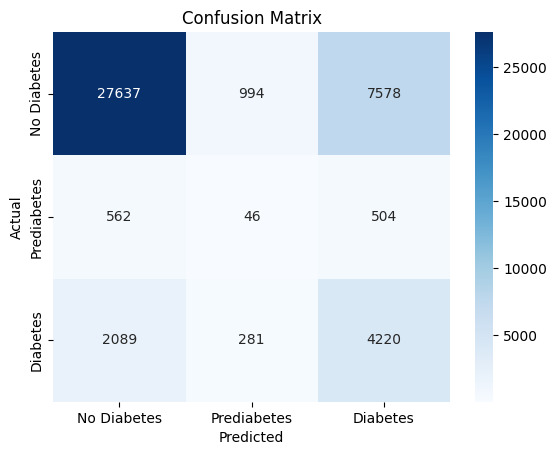

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.2. SMOTE-NC

In [51]:
X_train_resample, y_train_resample = samples[1].drop('Class', axis=1), samples[1]['Class']
y_train_resample.value_counts().sort_index()

,count
Class,
0.0,14565
1.0,14380
2.0,14555


In [52]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [53]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [54]:
precision_score(y_test, y_pred, average = None)

array([0.90985887, 0.041403  , 0.38261785])

In [55]:
recall_score(y_test, y_pred, average = None)

array([0.74959264, 0.20593525, 0.49635812])

In [56]:
f1_score(y_test, y_pred, average = None)

array([0.82198667, 0.06894475, 0.43212894])

In [57]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.77977165, 0.6324265 , 0.799115  ])

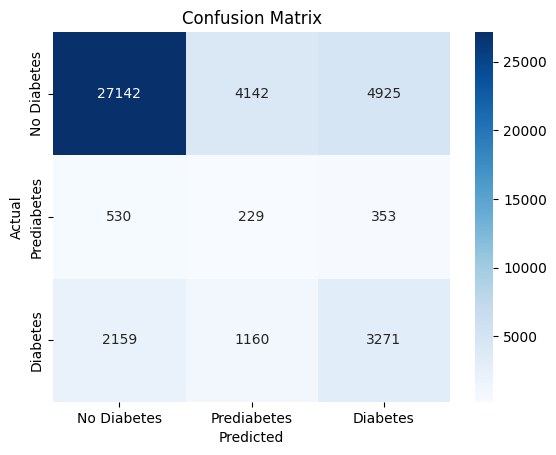

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues'
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.3 ENN

In [59]:
X_train_resample, y_train_resample = samples[5].drop('Class', axis=1), samples[5]['Class']
y_train_resample.value_counts().sort_index()

,count
Class,
0.0,9741
1.0,434
2.0,107


In [60]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=11
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=11, min_samples_leaf=3,
                       random_state=42)

In [61]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [62]:
precision_score(y_test, y_pred, average = None)

array([0.87989204, 0.041201  , 0.52512777])

In [63]:
recall_score(y_test, y_pred, average = None)

array([0.8643155 , 0.2221223 , 0.18710167])

In [64]:
f1_score(y_test, y_pred, average = None)

array([0.87203422, 0.06950893, 0.27590065])

In [65]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.77496661, 0.62799611, 0.76162775])

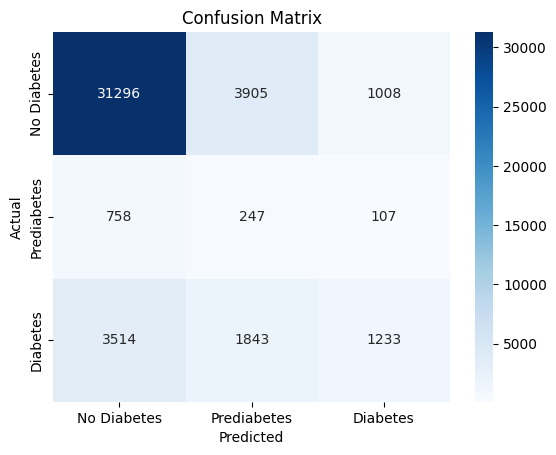

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2.4 SMOTE-ENN

In [67]:
X_train_resample, y_train_resample = samples[-2].drop('Class', axis=1), samples[-2]['Class']
y_train_resample.value_counts().sort_index()

,count
Class,
0.0,8427
1.0,14080
2.0,12371


In [68]:
rf = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=17, min_samples_leaf=3,
                       random_state=42)

In [69]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

In [70]:
precision_score(y_test, y_pred, average = None)

array([0.92285704, 0.03690561, 0.3284857 ])

In [71]:
recall_score(y_test, y_pred, average = None)

array([0.72222376, 0.04676259, 0.7060698 ])

In [72]:
f1_score(y_test, y_pred, average = None)

array([0.81030583, 0.04125347, 0.44837389])

In [73]:
roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)

array([0.79341249, 0.64380646, 0.80179546])

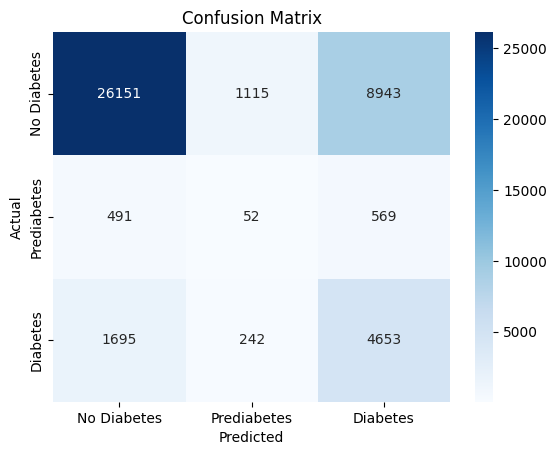

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            yticklabels=['No Diabetes', "Prediabetes", 'Diabetes'],
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. KẾT QUẢ

In [75]:
def sort(data):
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            if data[i] < data[j]:
                data[i], data[j] = data[j], data[i]
    return data

In [76]:
samples_ = samples.copy()
samples_.insert(0, origin)
samples_.insert(1, test)
names_ = names.copy()
names_.insert(0, 'Origin')
names_.insert(1, 'Test')
result1 = []
for i in range(len(samples_)):
    d = samples_[i].value_counts('Class').sort_index().to_list()
    temp = d.copy()
    d_reorder = sort(d)
    m = sum(d_reorder)/3
    n = m/10
    major = [i for i in d_reorder if i >= m+n]
    minor = [i for i in d_reorder if i <= m-n]
    if np.sum(major) == 0 or d_reorder[0]-d_reorder[-1] < 1000:
        major = d_reorder[:2]
        minor = d_reorder[-2:]
    IR = np.round(np.sum(major)/np.sum(minor),2)
    result1.append(temp)
    result1[-1].append(IR)
    result1[-1].insert(0, names_[i])
result1 = pd.DataFrame(result1, columns=['Method', 'No Diabetes','Prediabetes', 'Diabetes', 'IR'])
result1.index = result1.Method
result1.drop('Method', axis = 1, inplace = True)
path = os.path.join(project_url, 'Result/d2/DataCounts.csv')
result1.to_csv(path)
result1

,No Diabetes,Prediabetes,Diabetes,IR
Method,,,,
Origin,14441,472,2651,4.62
Test,36209,1112,6590,4.70
SMOTE,14565,14380,14555,1.01
SMOTENC,14565,14380,14555,1.01
ADASYN,14530,14277,13820,1.03
NearMiss,438,430,409,1.03
TomekLinks,13521,410,1754,6.25
ENN,9741,434,107,18.01
SMOTEENN,8427,14080,12371,1.67


In [77]:
result2 = result1[(result1.index == 'Origin') | (result1.index == 'Test')]
result2.index = ['Train', 'Test']
path = os.path.join(project_url, 'Result/d2/TrainTestCounts.csv')
result2.to_csv(path)
result2

,No Diabetes,Prediabetes,Diabetes,IR
Train,14441,472,2651,4.62
Test,36209,1112,6590,4.70
